In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# running Community Detection on Karate dataset.
G=nx.karate_club_graph()

In [5]:
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())

Number of nodes:  34
Number of edges:  78


Number of communities:  3
Community 1 :  frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
Community 2 :  frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
Community 3 :  frozenset({0, 16, 19, 4, 5, 6, 10, 11})
Modularity of the partition:  0.41096493693896297


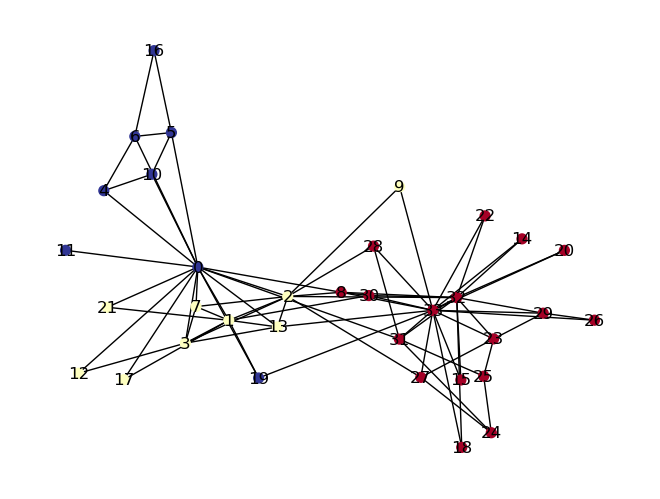

In [12]:
from networkx.algorithms.community import greedy_modularity_communities

communities=greedy_modularity_communities(G)

print("Number of communities: ", len(communities))
for i in range(len(communities)):
    print("Community", i+1, ": ", communities[i])

# Calculate the modularity of the found partition
modularity_score_fast_greedy = nx.community.modularity(G, communities)
print("Modularity of the partition: ",modularity_score_fast_greedy)

# Create a dictionary to map nodes to colors based on their community
colors= plt.cm.RdYlBu(np.linspace(0, 1, len(communities))) # Generate a distinct color for each community

#['blue', 'purple', 'green', 'hotpink'] #

node_colors = {}
for i, community in enumerate (communities):
    for node in community:
        node_colors[node]= colors[i]

#Sort the colors by node for consistent drawing
sorted_node_colors= [node_colors[node] for node in sorted (G.nodes())]

#plotting the graph
nx.draw_spring(G, node_color =sorted_node_colors, node_size=50, with_labels=8)
plt.show()

Number of communities:  4
Community  2 :  {1, 2, 3, 7, 12, 13}
Community  2 :  {0, 4, 5, 6, 10, 11, 16, 17, 19, 21}
Community  2 :  {23, 24, 25, 27, 28, 31}
Community  2 :  {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}

Modularity of the partition:  0.4276718952043627


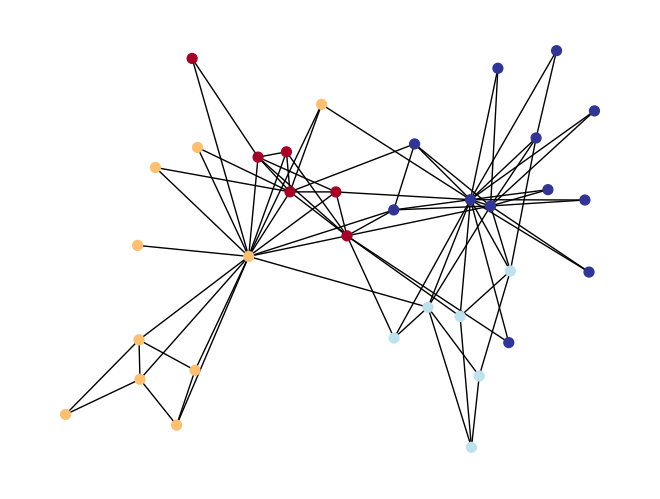

In [18]:
communities=nx.community.louvain_communities(G, seed=123)

print("Number of communities: ", len(communities))
for i in range(len(communities)):
    print("Community ", 1+1, ": ", communities[i])

#Calculate the modularity of the found partitions 
modularity_score_louvain=nx.community.modularity(G, communities)
print("\nModularity of the partition: ",modularity_score_louvain)

#coloring nodes according to their community.
colors= plt.cm.RdYlBu(np.linspace(0, 1, len(communities))) # Generate a distinct color for each community

#Create a dictionary to map nodes to colors based on their community
node_colors = {}
for i, community in enumerate(communities):
    for node in community:
        node_colors [node] = colors[i]

#Sort the colors by node for consistent drawing
sorted_node_colors= [node_colors[node] for node in sorted(G.nodes())]

#plotting the graph
nx.draw_spring(G, node_color=sorted_node_colors, node_size=50, with_labels=0)
plt.show()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'bayanpy', 'leidenalg', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}

Iterating through communities:
Community (i):  [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community (i):  [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
Community (i):  [4, 5, 6, 10, 16]
Modularity score:  0.4321039710650101


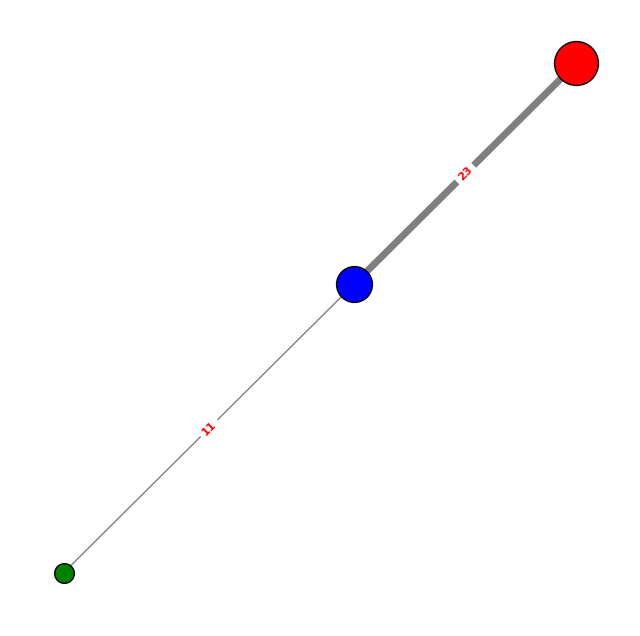

In [21]:
from cdlib import algorithms, evaluation, viz

communities=algorithms.infomap(G)

#You can also iterate through the communities:
print("\nIterating through communities:")
for i, community in enumerate (communities.communities):
    print("Community (i): ", community)

#Evaluate the clustering using a fitness function (e.g., modularity)
modularity_score_infomap=evaluation.newman_girvan_modularity(G, communities).score

print(f"Modularity score: ",modularity_score_infomap)

#Plot the communities
viz.plot_community_graph(G, communities)
plt.show()

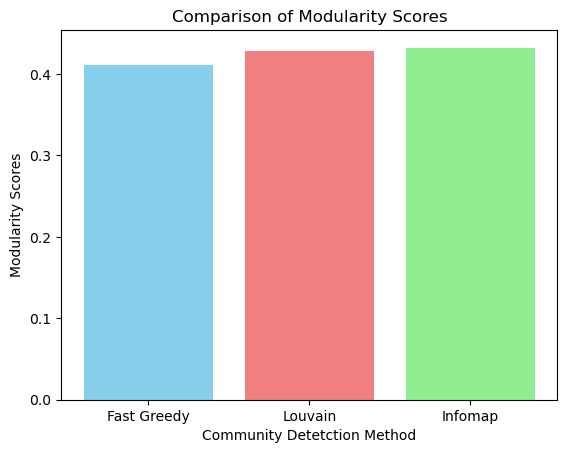

In [24]:
#Data for the bar graph
methods=['Fast Greedy', 'Louvain', 'Infomap']
modularity_scores=(modularity_score_fast_greedy, modularity_score_louvain, modularity_score_infomap)

#Create the bar graph
plt.bar(methods, modularity_scores, color=['skyblue', 'lightcoral', 'lightgreen'])

#Add a title to the graph
plt.title('Comparison of Modularity Scores')

#Add labels to the x-axis and y-axis
plt.xlabel('Community Detetction Method')
plt.ylabel('Modularity Scores')

#Display the graph
plt.show()